# Proyecto Final: Matrices aleatorias, decoherencia, caos cuántico

# Alvarado Mijangos Sandra Nashieli
# Rubiol García Adán Miguel


                                          
 La decoherencia cuántica es la pérdida de la coherencia cuántica. En mecánica cuántica, las partículas como los electrones se describen mediante una función de onda, una descripción matemática del estado cuántico de un sistema; la naturaleza probabilística de la función de onda da lugar a varios efectos cuánticos. Mientras exista una relación de fase definida entre los diferentes estados, se dice que el sistema es coherente. Esta coherencia es una propiedad fundamental de la mecánica cuántica, y es necesaria para el funcionamiento de las computadoras cuánticas. Sin embargo, cuando un sistema cuántico no está perfectamente aislado, sino en contacto con su entorno, la coherencia decae con el tiempo, un proceso llamado decoherencia cuántica. Como resultado de este proceso, se pierde el comportamiento cuántico relevante.

La decoherencia fue introducida por primera vez en 1970 por el físico alemán H. Dieter Zeh  y ha sido objeto de investigación activa desde la década de 1980.


Una matriz de densidad es una matriz que describe un sistema cuántico en un estado mixto, un conjunto estadístico de varios estados cuánticos. Esto debe contrastarse con un vector de estado único que describe un sistema cuántico en estado puro.

El efecto de la decoherencia en las matrices de densidad es esencialmente la desintegración o desaparición rápida de los elementos fuera de diagonal de la traza parcial de la matriz de densidad del sistema de unión, es decir, la traza, con respecto a cualquier base ambiental, de la matriz de densidad del sistema combinado y su entorno La decoherencia convierte irreversiblemente la matriz de densidad "promediada"  desde un estado puro a una mezcla reducida; es esto lo que da la apariencia de un colapso de la función de onda. 
La ventaja de tomar la traza parcial es que este procedimiento es indiferente a la base ambiental elegida.

Inicialmente, la matriz de densidad del sistema combinado se puede denotar como,
                                          
                                          Se  analiza  el hamiltoniano

$$H= \frac{a}{2} \sigma_{z} \otimes  \mathbb{1}_{nxn}+ \mathbb{1}_{2x2}\otimes H_{env}+ g\times V_{2x2}$$

 ![matrez](http://localhost:8888/view/Desktop/slide_4.jpg)
 
 

In [44]:
function GOE(dim)#se crea la función para en ensamble de matrices aleatorias GOE
   (x -> (x+x')/2)(randn(dim,dim))#se toma la definición de matrices GOE
end

GOE (generic function with 1 method)

In [45]:
function GUE(dim)#se crea la función para en ensamble de matrices aleatorias GUE
  (x -> (x+x')/2)(randn(dim,dim)+im*randn(dim,dim))#se toma de la definición de matrices GUE
    end

GUE (generic function with 1 method)

In [46]:
Sz=[1 0;0 -1]#El operador matriz de pauli Sigma Z

2×2 Array{Int64,2}:
 1   0
 0  -1

In [47]:
#con esta función creamos estados aleatorios factorizables
function random_state(dim)
    v=kron([1,0],randn(dim,1))#el estado se puede factorizar con el spin (1,0), y un estado aleatorio
    v=v/norm(v)#se normaliza el estado
    return v# se regresa el estado normalizado
end


random_state (generic function with 1 method)

In [48]:
function projector(state)#se crea el operador de proyección
    return state*state'
end

projector (generic function with 1 method)

In [49]:
#en esta función se calcula latraza parcial 
function partial_trace_pure_bipartite_mat(state,dim,system)
    dimtotal=length(state)[1]#tomamos la dimensión de la matriz de densidad 
    dimcomp=Int(dimtotal/dim)#se calcula la dimensión compuesta como la dimensión total entre la dimensión del sistema respecto 
    #cual se tomará la traza parcial
    psi=reshape(state,(dimcomp,dim))'#se define una nueva matriz con las dimensiones del sistema
    if system==1# si el sistema es igual al sistema 1
        psi=conj(psi)# se calcula el conjugado
        return psi*psi'#y se regresa el pryector en ese estado
        elseif system==2# sino se debe calcular el producto interno
        return psi'*psi#se regresa el produnto interno
    end
end

partial_trace_pure_bipartite_mat (generic function with 1 method)

In [ ]:
function H(a,n,g)#esta función calcula la pureza de estados generados aleatoriamente con una distribución gaussiana como la 
    #anterior, a distintos tiempos
    goe=GOE(2*n)#definimos el hamiltoniano de interacción entre el sistema y el ambiente_1
    gue=GUE(n)#definimos el hamiltoniano del ambiente libre de interacciones
    h=(a/2)*kron(Sz,eye(n))+ kron(eye(2),gue)+ g*goe#se define el hamiltoniano completo(incluido el sistema central)
    t=0:0.1:100;#se crea una lista de tiempo
    V=random_state(n)#se crea un estado aleatorio de dimensión n
    rho = []#se cre una lista para guardar las matrices de densidad 
#en este for se evoluciona el estado dado en V usando el operador de evolución temporal
for i in 1:length(t)
    psi=(expm(-im*h*t[i]))*(projector(V))*(expm(im*h*t[i]))#se calcula la matriz de densidad al tiempo t del estado V
    psi=psi/norm(psi)#se normaliza el estado 
    push!(rho,psi)#se guarda en una lista la evolución de la matriz de densidad a distintos tiempos
end
partial=[]#creamos una lista para guardar la traza parcial
for i in 1:length(rho)#en este for se calcula la traza parcial para la matriz de densidad a cada tiempo
trace=partial_trace_pure_bipartite_mat(rho[i],2,1)
push!(partial,trace)#se guarda la traza parcial en una lista
end
densit2=[]#se crea una lista para guardar la matriz al cuadrado
for i in 1:length(rho)#en este for se calcula el cuadrado de la traza parcial a cada tiempo t de la lista
densit = (partial[i])*(partial[i])#se eleva al cuadrado
    push!(densit2,densit)#se guarda la matriz obtenida
end
traza=[]#finalmente se calcula la traza de las matrices obtenidas en el paso anterior
for i in 1:length(densit2)
traz=trace(densit2[i])#se calcula la traza para cada elemento de la lista
    push!(traza,traz)#guardamos el valor de la traza a cada tiempo t
end
return t,traza, gue, goe# se regresa la lista de tiempo, la lista con la traza al tiempo t, y las matrices GUE(hamiltonia libre 
#, del ambiente) y la matriz GOE(hamiltoniano de interacción)
end


In [51]:
using PyPlot

In [52]:
(t,traza,gue,goe)=H(1,6,0.02)#se asignan los valores de la lista t, la lista con la traza, las matrices GUE y GOE
#eligiendo el parametro a=1, g=0.02

(0.0:0.1:100.0, Any[1.0+0.0im, 0.999971+0.0im, 0.999895+0.0im, 0.9998+0.0im, 0.999701+0.0im, 0.999597+0.0im, 0.999497+0.0im, 0.999422+0.0im, 0.999385+0.0im, 0.999379+0.0im  …  0.998891+0.0im, 0.998548+0.0im, 0.998213+0.0im, 0.997949+0.0im, 0.997782+0.0im, 0.997687+0.0im, 0.997609+0.0im, 0.997478+0.0im, 0.99725+0.0im, 0.996923+0.0im], Complex{Float64}[0.232514+0.0im -0.311751+0.262572im … -0.402119+0.192097im -1.12912-0.295068im; -0.311751-0.262572im -0.396777+0.0im … 0.530028-2.02864im -1.03968-1.02822im; … ; -0.402119-0.192097im 0.530028+2.02864im … 1.61303+0.0im -0.0566545-1.25927im; -1.12912+0.295068im -1.03968+1.02822im … -0.0566545+1.25927im 0.345552+0.0im], [0.422923 -1.80208 … -1.13192 -1.05849; -1.80208 -0.956627 … 1.21654 -0.095406; … ; -1.13192 1.21654 … -0.985248 1.31551; -1.05849 -0.095406 … 1.31551 0.173492])

In [53]:
(t,traza2,gue2,goe2)=H(1,6,0.01)#se asignan los valores de la lista t, la lista con la traza, y otras  las matrices GUE y GOE
#eligiendo el parametro a=1, g=0.01

(0.0:0.1:100.0, Any[1.0+0.0im, 0.999996+0.0im, 0.999987+0.0im, 0.999973+0.0im, 0.999956+0.0im, 0.999938+0.0im, 0.999918+0.0im, 0.999896+0.0im, 0.999871+0.0im, 0.999843+0.0im  …  0.954343+0.0im, 0.954006+0.0im, 0.953713+0.0im, 0.95348+0.0im, 0.953317+0.0im, 0.953228+0.0im, 0.953211+0.0im, 0.953258+0.0im, 0.953357+0.0im, 0.953496+0.0im], Complex{Float64}[0.349455+0.0im 0.229439+1.12343im … 0.400567+0.538019im 0.353019-0.127772im; 0.229439-1.12343im 0.110939+0.0im … 0.244368+0.743635im 0.708066-0.65232im; … ; 0.400567-0.538019im 0.244368-0.743635im … -0.638677+0.0im -0.341375-0.215362im; 0.353019+0.127772im 0.708066+0.65232im … -0.341375+0.215362im -0.874329+0.0im], [0.00673672 -0.0926531 … 0.940882 -0.676132; -0.0926531 -1.37643 … -0.803865 0.446501; … ; 0.940882 -0.803865 … 1.01161 -0.788062; -0.676132 0.446501 … -0.788062 0.147535])

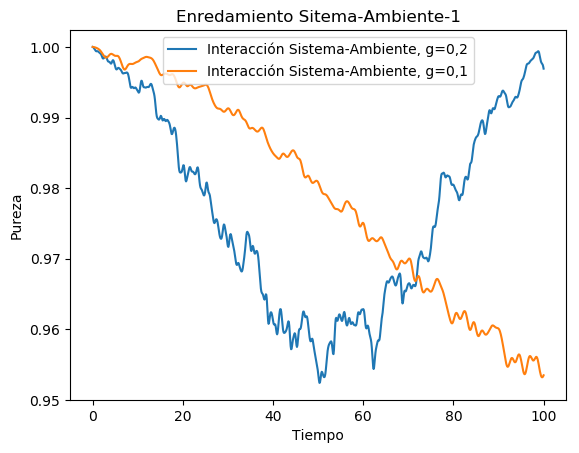

PyObject <matplotlib.legend.Legend object at 0x0000000038AD0390>

In [56]:
#se grafica como decae la pureza respecto al tiempo para el hamiltoniano anterior y se comparan con 2 valores distintos 
#del parámetro g
xlabel("Tiempo");ylabel("Pureza")
title("Enredamiento Sitema-Ambiente-1")
plot(t,traza,label="Interacción Sistema-Ambiente, g=0,2");
plot(t,traza2,label="Interacción Sistema-Ambiente, g=0,1");
legend()

### Segunda Parte

In [31]:
function H2(a,n,g,G)#esta función calcula la pureza de estados generados aleatoriamente con una distribución gaussiana como la 
    #anterior, a distintos tiempos, pero al hamiltoniano anterior le agregamos otro ambiente
H=(a/2)*kron(Sz,eye(n),eye(n))+kron(eye(2),gue,eye(n))+g*kron(goe,eye(n))+kron(eye(2),eye(n),GUE(n))+G*kron(eye(2),GUE(n^2))
    t=0:0.1:100;#se crea una lista de tiempo
    V=random_state(n*n)#se crea un estado aleatorio de dimensión n
    rho = []#se cre una lista para guardar las matrices de densidad 
#en este for se evoluciona el estado dado en V usando el operador de evolución temporal
for i in 1:length(t)
    psi=(expm(-im*H*t[i]))*(projector(V))*(expm(im*H*t[i]))#se calcula la matriz de densidad al tiempo t del estado V
    psi=psi/norm(psi)#se normaliza el estado 
    push!(rho,psi)#se guarda en una lista la evolución de la matriz de densidad a distintos tiempos
    
end
partial=[]#creamos una lista para guardar la traza parcial
for i in 1:length(rho)
trace=partial_trace_pure_bipartite_mat(rho[i],2,1)#en este for se calcula la traza parcial para la matriz de densidad
        #a cada tiempo
push!(partial,trace)#se guarda la traza parcial en una lista
end
densit2=[]#se crea una lista para guardar la matriz al cuadrado
for i in 1:length(rho)#en este for se calcula el cuadrado de la traza parcial a cada tiempo t de la lista
densit = (partial[i])*(partial[i])#se eleva al cuadrado
    push!(densit2,densit)#se guarda la matriz obtenida
end
traza=[]#finalmente se calcula la traza de las matrices obtenidas en el paso anterior
for i in 1:length(densit2)#se calcula la traza para cada elemento de la lista
traz=trace(densit2[i])#guardamos el valor de la traza a cada tiempo t
    push!(traza,traz)# se regresa la lista de tiempo, la lista con la traza al tiempo t, y las matrices GUE(hamiltonia libre 
#, del ambiente) y la matriz GOE(hamiltoniano de interacción)
end
return t, traza# se regresa la lista de tiempo, la lista con la traza al tiempo t
end

H2 (generic function with 1 method)

In [32]:
(t,traza3)=H2(1,6,0.01,0.01)#se asigna el valor a la salida de la lista de tiempo, y la lista con la traza de los estados

(0.0:0.1:100.0, Any[1.0+0.0im, 0.999994+0.0im, 0.999978+0.0im, 0.999954+0.0im, 0.999922+0.0im, 0.999885+0.0im, 0.999842+0.0im, 0.999798+0.0im, 0.999756+0.0im, 0.99972+0.0im  …  0.836935+0.0im, 0.83674+0.0im, 0.836539+0.0im, 0.836338+0.0im, 0.836131+0.0im, 0.835902+0.0im, 0.835626+0.0im, 0.835278+0.0im, 0.83485+0.0im, 0.834355+0.0im])

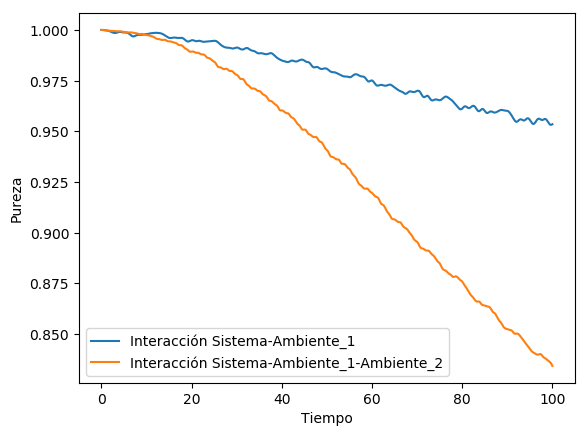

PyObject <matplotlib.legend.Legend object at 0x00000000394EE4A8>

In [60]:
#se grafica el decaimento de la pureza respecto al tiempo, y se compara cuando el sistema interectua con un sólo ambiente, 
#y cuando interacciona con el mismo que el anterior y se le agrega uno mas grande
xlabel("Tiempo");ylabel("Pureza")

plot(t,traza2,label="Interacción Sistema-Ambiente_1");
plot(t,traza3,label="Interacción Sistema-Ambiente_1-Ambiente_2");
legend()